In [226]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  

Data description

In [227]:
df_zomato = pd.read_csv(r"C:\Users\Prashant\Documents\Machine Learing Workspace\Data\zomato.csv")
df_zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [228]:
df_zomato.describe(include = object)

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/sri-venkatesw...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [229]:
print(df_zomato.shape)
print(df_zomato.columns)

(51717, 17)
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


Removing Unnecessary Columns

In [230]:
df_zomato.drop(['url','phone', 'address', 'menu_item'],inplace =True,axis=1)

In [231]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


Null check 

In [232]:
df_zomato.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [233]:
#Counting the number of duplicate rows
print('Duplicate data: ',df_zomato.duplicated().sum())
#Removing duplicate data
df_zomato.drop_duplicates(inplace=True)
print('Updated DF shape:', df_zomato.shape)

Duplicate data:  72
Updated DF shape: (51645, 13)


In [234]:
df_zomato.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7757
votes                              0
location                          21
rest_type                        227
dish_liked                     28019
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Renaming Columns

In [235]:
df_zomato.rename(columns={'approx_cost(for two people)': 'Cost', 'listed_in(type)':'type', 'listed_in(city)':'city','reviews_list':'reviews'},inplace=True)
df_zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'Cost', 'reviews', 'type',
       'city'],
      dtype='object')

In [236]:
#Determining data discrepancy as cost column has comma
df_zomato['Cost']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: Cost, Length: 51645, dtype: object

In [237]:
#Removing comma values
df_zomato['Cost'] = (df_zomato['Cost']).astype(str)
df_zomato['Cost'] = df_zomato['Cost'].replace(',','',regex=True)

#Removing nan
print('Size of data with nan: ',df_zomato['Cost'].shape[0])
print('Number of nan rows:',df_zomato.loc[df_zomato['Cost'] =='nan'].shape[0])
df_zomato = df_zomato.loc[df_zomato['Cost'] !='nan']
print('Size of data without nan: ',df_zomato['Cost'].shape[0])

Size of data with nan:  51645
Number of nan rows: 345
Size of data without nan:  51300


Determining null percentage and removing them

In [238]:
def percentage_null(data):
    percent_missing = df_zomato.isnull().sum() * 100 / len(df_zomato)
    return percent_missing

percentage_null(df_zomato)

name             0.000000
online_order     0.000000
book_table       0.000000
rate            14.937622
votes            0.000000
location         0.000000
rest_type        0.397661
dish_liked      54.208577
cuisines         0.037037
Cost             0.000000
reviews          0.000000
type             0.000000
city             0.000000
dtype: float64

In [239]:
#INSIGHTS: Dish_liked is 54 percent which we cannot remove and need to replace with a differnt category
df_zomato['dish_liked'] = df_zomato['dish_liked'].replace(np.nan,'None')
percentage_null(df_zomato)

name             0.000000
online_order     0.000000
book_table       0.000000
rate            14.937622
votes            0.000000
location         0.000000
rest_type        0.397661
dish_liked       0.000000
cuisines         0.037037
Cost             0.000000
reviews          0.000000
type             0.000000
city             0.000000
dtype: float64

In [240]:
# Removing all the other nulls
df_zomato.dropna(how='any',inplace=True)
df_zomato.isna().sum()
df_zomato.shape

(43480, 13)

Altering rating column

In [241]:
df_zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [242]:
df_zomato['rate'].replace('-','NEW',inplace=True)

In [243]:
df_zomato['rate'] = df_zomato['rate'].astype(str)
df_zomato['rate'].replace('/5','',regex=True,inplace=True)

In [244]:
#Calculating the number of records for which there are no ratings
perc_no_rating =(len(df_zomato[df_zomato['rate'] =='NEW'])/ len(df_zomato))*100
print('Number of records where rate is NEW: ',len(df_zomato[df_zomato['rate'] =='NEW']))
print('Number of records where rate is -: ',len(df_zomato[df_zomato['rate'] =='-']))
print('Percentage of record with no ratings: ',np.round(perc_no_rating,2))
print('Cost column with na ratings: ',df_zomato['Cost'].isna().sum())
print('Cost column null ratings: ',df_zomato['Cost'].isnull().sum())

Number of records where rate is NEW:  2259
Number of records where rate is -:  0
Percentage of record with no ratings:  5.2
Cost column with na ratings:  0
Cost column null ratings:  0


In [245]:
#Since these are new restraunts , these cannot determine the impact of factors on restraunts
pd.options.mode.chained_assignment = None
df_zomato_new = df_zomato[df_zomato.iloc[:,3]!='NEW']
df_zomato_new['rate'] = df_zomato_new['rate'].astype(float)
df_zomato_new['Cost'] = df_zomato_new['Cost'].astype(float)

In [246]:
df_zomato_new.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [247]:
df_zomato_new['online_order'] = df_zomato_new['online_order'].map({'Yes':1,'No':'0'}).astype(int)
df_zomato_new['book_table'] = df_zomato_new['book_table'].map({'Yes':1,'No':'0'}).astype(int)

In [248]:
df_zomato_new.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [249]:
df_zomato_new.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
Cost            0
reviews         0
type            0
city            0
dtype: int64

In [250]:
df_zomato_new.describe(include=object)

,name,location,rest_type,dish_liked,cuisines,reviews,type,city
count,41221,41221,41221,41221,41221,41221,41221,41221
unique,6602,92,87,5195,2367,21103,7,30
top,Cafe Coffee Day,BTM,Quick Bites,None,North Indian,[],Delivery,BTM
freq,86,3873,13865,17974,2107,1110,20423,2580


In [251]:
#Correlation matrix
df_corr = df_zomato_new.corr()
df_corr

,online_order,book_table,rate,votes,Cost
online_order,1.000000,-0.055059,0.069148,-0.013232,-0.175640
book_table,-0.055059,1.000000,0.426124,0.393436,0.614323
rate,0.069148,0.426124,1.000000,0.435226,0.385249
votes,-0.013232,0.393436,0.435226,1.000000,0.366522
Cost,-0.175640,0.614323,0.385249,0.366522,1.000000


<AxesSubplot:>

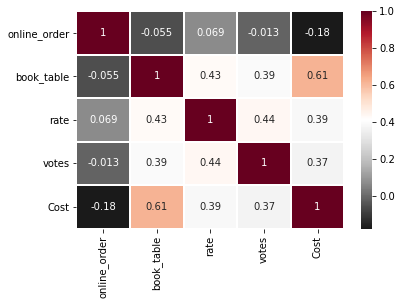

In [252]:
sns.heatmap(df_corr,linewidth = 0.3,annot = True,cmap = 'RdGy_r')

Popular restraunts in bangalore

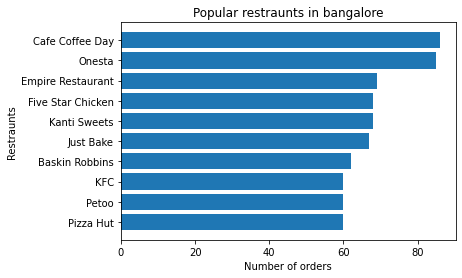

In [253]:
pop_rest=df_zomato_new['name'].value_counts(sort=True,ascending=False).reset_index().rename(columns={'index':'restraunt_name','name':'Tot_orders'}).head(10)
pop_rest.sort_values('Tot_orders',inplace=True)
plt.barh(pop_rest['restraunt_name'],pop_rest['Tot_orders'],)
plt.ylabel('Restraunts')
plt.xlabel('Number of orders')
plt.title('Popular restraunts in bangalore')
plt.show()

In [254]:
df_zomato_new.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


Preferable mode of order

In [292]:
#Create a plotting funtion
def plot_df_func(operation,dataframe,col_x,col_y,x_label,y_label,title):
    if(operation=='count'):
        plot_df = dataframe.groupby([col_x],as_index=False)[col_y].count()
        plot_df = plot_df.head(10)
        plt.bar(plot_df.iloc[:,0],plot_df.iloc[:,1])
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        return plt.show()

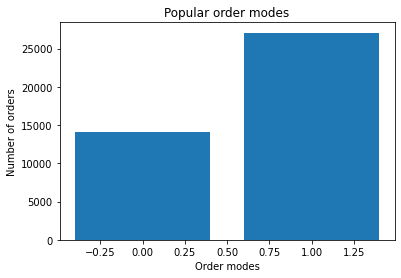

In [293]:
# pop_mode = df_zomato_new.loc[:,['online_order','rate']]
# pop_mode['online_order'] = str(pop_mode['online_order'])
plot_df_func('count',df_zomato_new,'online_order','rate','Order modes','Number of orders','Popular order modes')

In [311]:
#Replacing values 1,0 with string - offine/online
def map_string(i):
    if i==0:
        return 'Offline'
    else:
        return 'Online'

pop_order['Order_mode'] = list(map(map_string, pop_order['Order_mode']))
pop_order.head()

,Order_mode,Tot_orders
0,Online,41221
